In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## PCA实例

In [3]:
# load data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# df.label.value_counts()  # 【0, 1, 2】各50个
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# show data
X = df.iloc[:, 0:4]
y = df.iloc[:, -1]
print("查看第一个数据： \n", X.iloc[0])
print("查看第一个标签： \n", y.iloc[0])

查看第一个数据： 
 sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
Name: 0, dtype: float64
查看第一个标签： 
 0


### 1. PCA基础【复现】

对于数据集计算协方差矩阵，提供特征之间的相关性信息
```python
# normalize the data
X = X - np.mean(X, axis=0) # 每个特征的期望（列均值）
# calculate the covariance matrix
cov = (1 / (n_samples - 1)) * np.dot(X.T, X)
```

In [23]:
class PCA:
    def __init__(self):
        pass

    def fit(self, X, n_components):
        n_samples = X.shape[0]
        # 1. normalize
        X = X - np.mean(X, axis=0)
        # 2. calculate covariance matrix
        cov = (1 / (n_samples - 1)) * np.dot(X.T, X)  # 提供特征之间的相关性信息 
        # 3. calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # 4. sort eigenvalues descending and choose the top n_components
        idxs = np.argsort(eigenvalues)[::-1]
        # eigenvectors = eigenvectors[idxs[:n_components]]
        eigenvectors_components = np.atleast_1d(eigenvectors[:, idxs])[:, :n_components]
        # 5. transform data, get low-dimensional data
        X_transformed = np.dot(X, eigenvectors_components)
        return X_transformed  # (n_samples, n_components)

In [24]:
model = PCA()
Y = model.fit(X, 2)

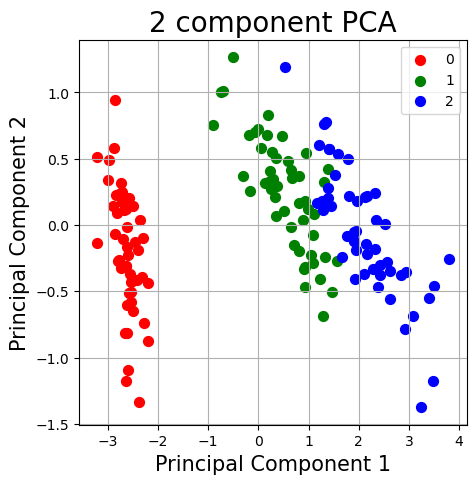

In [25]:
principalDf = pd.DataFrame(data=Y, columns=['principal component 1', 'principal component 2'])
df = pd.concat([principalDf, y], axis=1)

# plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2]
# ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df['label'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### 2. sklearn中PCA的实现

```python
from sklearn.decomposition import PCA
```

In [26]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y = sklearn_pca.fit_transform(X)

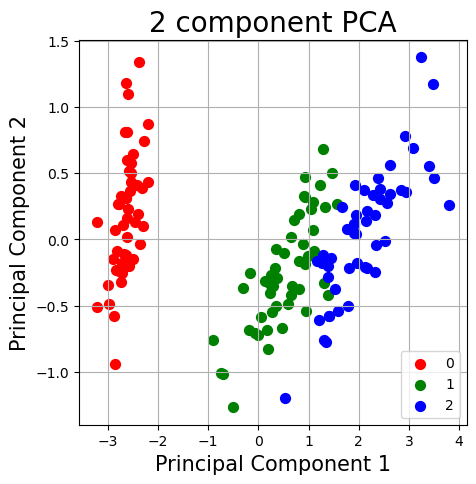

In [27]:
principalDf = pd.DataFrame(data=Y, columns=['principal component 1', 'principal component 2'])
df = pd.concat([principalDf, y], axis=1)

# plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2]
# ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = df['label'] == target
    ax.scatter(df.loc[indicesToKeep, 'principal component 1']
               , df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()